# D599 Task 1

Below is my walkthrough for D599 Task 1 Data Cleaning. Below you'll find the packages used for this project as well as the loading of the Employee Turnover Dataset into a Data frame.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import missingno as msno
%matplotlib inline
from sklearn.impute import SimpleImputer

df = pd.read_csv('Employee Turnover Dataset.csv')
df.head(10)


,EmployeeNumber,Age,Tenure,Turnover,HourlyRate,HoursWeekly,CompensationType,AnnualSalary,DrivingCommuterDistance,JobRoleArea,Gender,MaritalStatus,NumCompaniesPreviouslyWorked,AnnualProfessionalDevHrs,PaycheckMethod,TextMessageOptIn
0,1,28,6,Yes,$24.37,40,Salary,50689.6,89,Research,Female,Married,3.0,7.0,Mail Check,Yes
1,2,33,2,Yes,$24.37,40,Salary,50689.6,89,Research,Female,Married,6.0,7.0,Mail Check,Yes
2,3,22,1,No,$22.52,40,Salary,46841.6,35,Information_Technology,Female,Single,1.0,8.0,Mailed Check,Yes
3,4,23,1,No,$22.52,40,Salary,46841.6,35,Information_Technology,Female,Single,3.0,NaN,Mailed Check,Yes
4,5,40,6,No,$88.77,40,Salary,284641.6,12,Sales,Prefer Not to Answer,Single,7.0,NaN,Mail Check,Yes
5,6,45,16,Yes,$88.77,40,Salary,284641.6,12,Sales,Prefer Not to Answer,Single,NaN,19.0,Mail Check,NaN
6,7,34,6,No,$28.43,40,Salary,59134.4,0,Human_Resources,Male,Single,2.0,23.0,Mail Check,Yes
7,8,37,9,Yes,$28.43,40,Salary,59134.4,0,Human_Resources,Male,Single,1.0,25.0,Mail Check,Yes
8,9,23,1,No,$21.87,40,Salary,45489.6,76,Human_Resources,Female,Single,1.0,NaN,Mail Check,Yes
9,10,24,1,Yes,$21.87,40,Salary,45489.6,76,Human_Resources,Female,Single,2.0,9.0,Mail Check,Yes


# Part I: Data Profiling

### A.  Review the data dictionary in the attached "Employee Turnover Considerations and Dictionary" document and provide profile data by doing the following within a document:

1.  ##### Identify the dataset’s number of records (i.e., rows) and number of variables (i.e., columns).

From the data above we can see that there are 16 variables, and 10,199 rows.

2.  ##### List each variable and indicate the variable’s data type (quantitative/numerical or qualitative/categorical) and data subtype (i.e., continuous/discrete or nominal/ordinal).

<table>
<tr><th>Variable</th><th>Data Type</th><th>Data Subtype</th></tr>
<tr><td>Age</td><td>Numerical</td><td>Discrete</td></tr>
  <tr><td>Tenure</td><td>Numerical</td><td>Discrete</td></tr>
  <tr><td>Turnover</td><td>Categorical</td><td>Nominal</td></tr>
  <tr><td>HourlyRate</td><td>Numerical</td><td>Continuous</td></tr>
  <tr><td>HoursWeekly</td><td>Numerical</td><td>Discrete</td></tr>
  <tr><td>CompensationType</td><td>Categorical</td><td>Nominal</td></tr>
  <tr><td>AnnualSalary</td><td>Numerical</td><td>Continuous</td></tr>
  <tr><td>DrivingCommuterDistance</td><td>Numerical</td><td>Discrete</td></tr>
  <tr><td>JobRoleArea</td><td>Categorical</td><td>Nominal</td></tr>
  <tr><td>Gender</td><td>Categorical</td><td>Nominal</td></tr>
  <tr><td>MaritalStatus</td><td>Categorical</td><td>Nominal</td></tr>
  <tr><td>NumCompaniesPreviouslyWorked</td><td>Numerical</td><td>Discrete</td></tr>
  <tr><td>AnnualProfessionalDevHrs</td><td>Numerical</td><td>Continuous</td></tr>
  <tr><td>PaycheckMethod</td><td>Categorical</td><td>Nominal</td></tr>
  <tr><td>TextMessageOptIn</td><td>Categorical</td><td>Nominal</td></tr>
</table>   

3.  ##### Identify a sample of observable values for each variable.

<table>
  <tr><th>Variable</th><th>Sample Values</th></tr>
  <tr><td>Age</td><td>[17, 22, 24, 25, 26]</td></tr>
  <tr><td>Tenure</td><td>[1, 6, 2, 4, 5]</td></tr>
  <tr><td>Turnover</td><td>[Yes, No, Yes, No, No]</td></tr>
  <tr><td>HourlyRate</td><td>[$24.32, $25.67, $23.77]</td></tr>
  <tr><td>HoursWeekly</td><td>[40, 40, 40, 25, 30]</td></tr>
  <tr><td>CompensationType</td><td>[Salary, Salary, Hourly, Salary]</td></tr>
  <tr><td>AnnualSalary</td><td>[50689.6, 50478.3, 70765.3]</td></tr>
  <tr><td>DrivingCommuterDistance</td><td>[89, 89, 35, 13, 6]</td></tr>
  <tr><td>JobRoleArea</td><td>["Research", "IT", "Research", "Sales"]</td></tr>
  <tr><td>Gender</td><td>["Female", "Male", "Male", "Female"]</td></tr>
  <tr><td>MaritalStatus</td><td>["Single", "Single", "Married", "Married"]</td></tr>
  <tr><td>NumCompaniesPreviouslyWorked</td><td>[3.0, 7.0, 1.0, 5.0]</td></tr>
  <tr><td>AnnualProfessionalDevHrs</td><td>[7.0, 8.0, 10.0, 0.0]</td></tr>
  <tr><td>PaycheckMethod</td><td>["Mail Check","Mail Check","Mail Check","Mail Check"]</td></tr>
  <tr><td>TextMessageOptIn</td><td>["Yes", NaN, "No", "Yes", NaN]</td></tr>
</table>

# Part II: Data Cleaning and Plan

Below I go through and clean the data in preparation for analysis.

### Duplicate Entries
Below are the duplicate entries listed in our data set based on Employee Number as the primary key. There are 99 duplicate values. In the next code blocks I drop these values and redisplay the duplicate values to ensure that they were removed. I utilize the pandas method .drop_duplicates for this, which performs a listwise deletion if a duplicate is found.
<br /><br />
    <ul>Pros of drop_duplicates:
        <li>Reliable and consistant listwise deletion, which is applicable in this case as no data is lost from duplicates being deleted.</li>
        <li>Code is simple and easy to execute, allowing for a more efficient use of time</li></ul>
        <br />
    <ul>Cons of drop_duplicates:
        <li>If I had not specified the duplicates to be from the employee number column, it could have very easily deleted valid data, which would have skewed my analysis.</li>
        <li>The method .drop_duplicates is only useful for listwise deletion. Had a primary key not been provided drop_duplicates would have been ineffective.</li></ul>

In [39]:
df[df.duplicated(subset=['EmployeeNumber'])]

,EmployeeNumber,Age,Tenure,Turnover,HourlyRate,HoursWeekly,CompensationType,AnnualSalary,DrivingCommuterDistance,JobRoleArea,Gender,MaritalStatus,NumCompaniesPreviouslyWorked,AnnualProfessionalDevHrs,PaycheckMethod,TextMessageOptIn
10100,1,28,6,Yes,$24.37,40,Salary,50689.6,89,Research,Female,Married,3.0,7.0,Mail Check,Yes
10101,2,33,2,Yes,$24.37,40,Salary,50689.6,89,Research,Female,Married,6.0,7.0,Mail Check,Yes
10102,3,22,1,No,$22.52,40,Salary,46841.6,35,Information_Technology,Female,Single,1.0,8.0,Mailed Check,Yes
10103,4,23,1,No,$22.52,40,Salary,46841.6,35,Information_Technology,Female,Single,3.0,NaN,Mailed Check,Yes
10104,5,40,6,No,$88.77,40,Salary,284641.6,12,Sales,Prefer Not to Answer,Single,7.0,NaN,Mail Check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10194,95,48,13,Yes,$85.40,40,Salary,177632.0,31,Research,Male,Single,7.0,5.0,Mail Check,NaN
10195,96,54,17,No,$85.40,40,Salary,177632.0,31,Research,Male,Single,2.0,25.0,Mail Check,Yes
10196,97,44,6,No,$71.90,40,Salary,149552.0,32,Marketing,Male,Married,6.0,NaN,Mail Check,Yes
10197,98,58,19,No,$71.90,40,Salary,149552.0,32,Marketing,Male,Married,5.0,23.0,Mail Check,Yes


In [44]:
df_drop_duplicates = pd.DataFrame(data=df)
df_drop_duplicates = df.drop_duplicates(subset=["EmployeeNumber"])
df_drop_duplicates[df_drop_duplicates.duplicated(subset=["EmployeeNumber"])]

,EmployeeNumber,Age,Tenure,Turnover,HourlyRate,HoursWeekly,CompensationType,AnnualSalary,DrivingCommuterDistance,JobRoleArea,Gender,MaritalStatus,NumCompaniesPreviouslyWorked,AnnualProfessionalDevHrs,PaycheckMethod,TextMessageOptIn


### Missing Values

In the blocks below I use the missingno library to exam the data frame for missing values and resolve the inconsistancies.
<br />
As we can see below our data is missing only in 3 columns: NumCompaniesPreviouslyWorked, AnnualProfessionalDevHrs, and TextMessageOptIn. Due to the wide range of missing values and wide area they all cover it is safe to assume that these values are Missing Completely At Random. Due to the non-essential nature of these three columns, I will perform a constant imputation replacing all the missing values with 0 or "Unknown" where appropriate.
<br /><br />
    <ul>Pros of a constant imputation:
        <li>Due to these columns being demographic based rather than essential data, it was simple to replace the missing values with the baseline value.</li>
        <li>Very effective at quickly placing placeholder values for missing data.</li></ul>
        <br />
    <ul>Cons of constant imputation:
        <li>If this data was highly essential, a constant imputation could result in our data being skewed. Adding a bunch of zeros that were not previously there can effect our mean, mode, etc.</li>
        <li>A constant imputation is simpler as it does not acknowledge data relationships like more advanced imputation models would.</li></ul>


<Axes: >

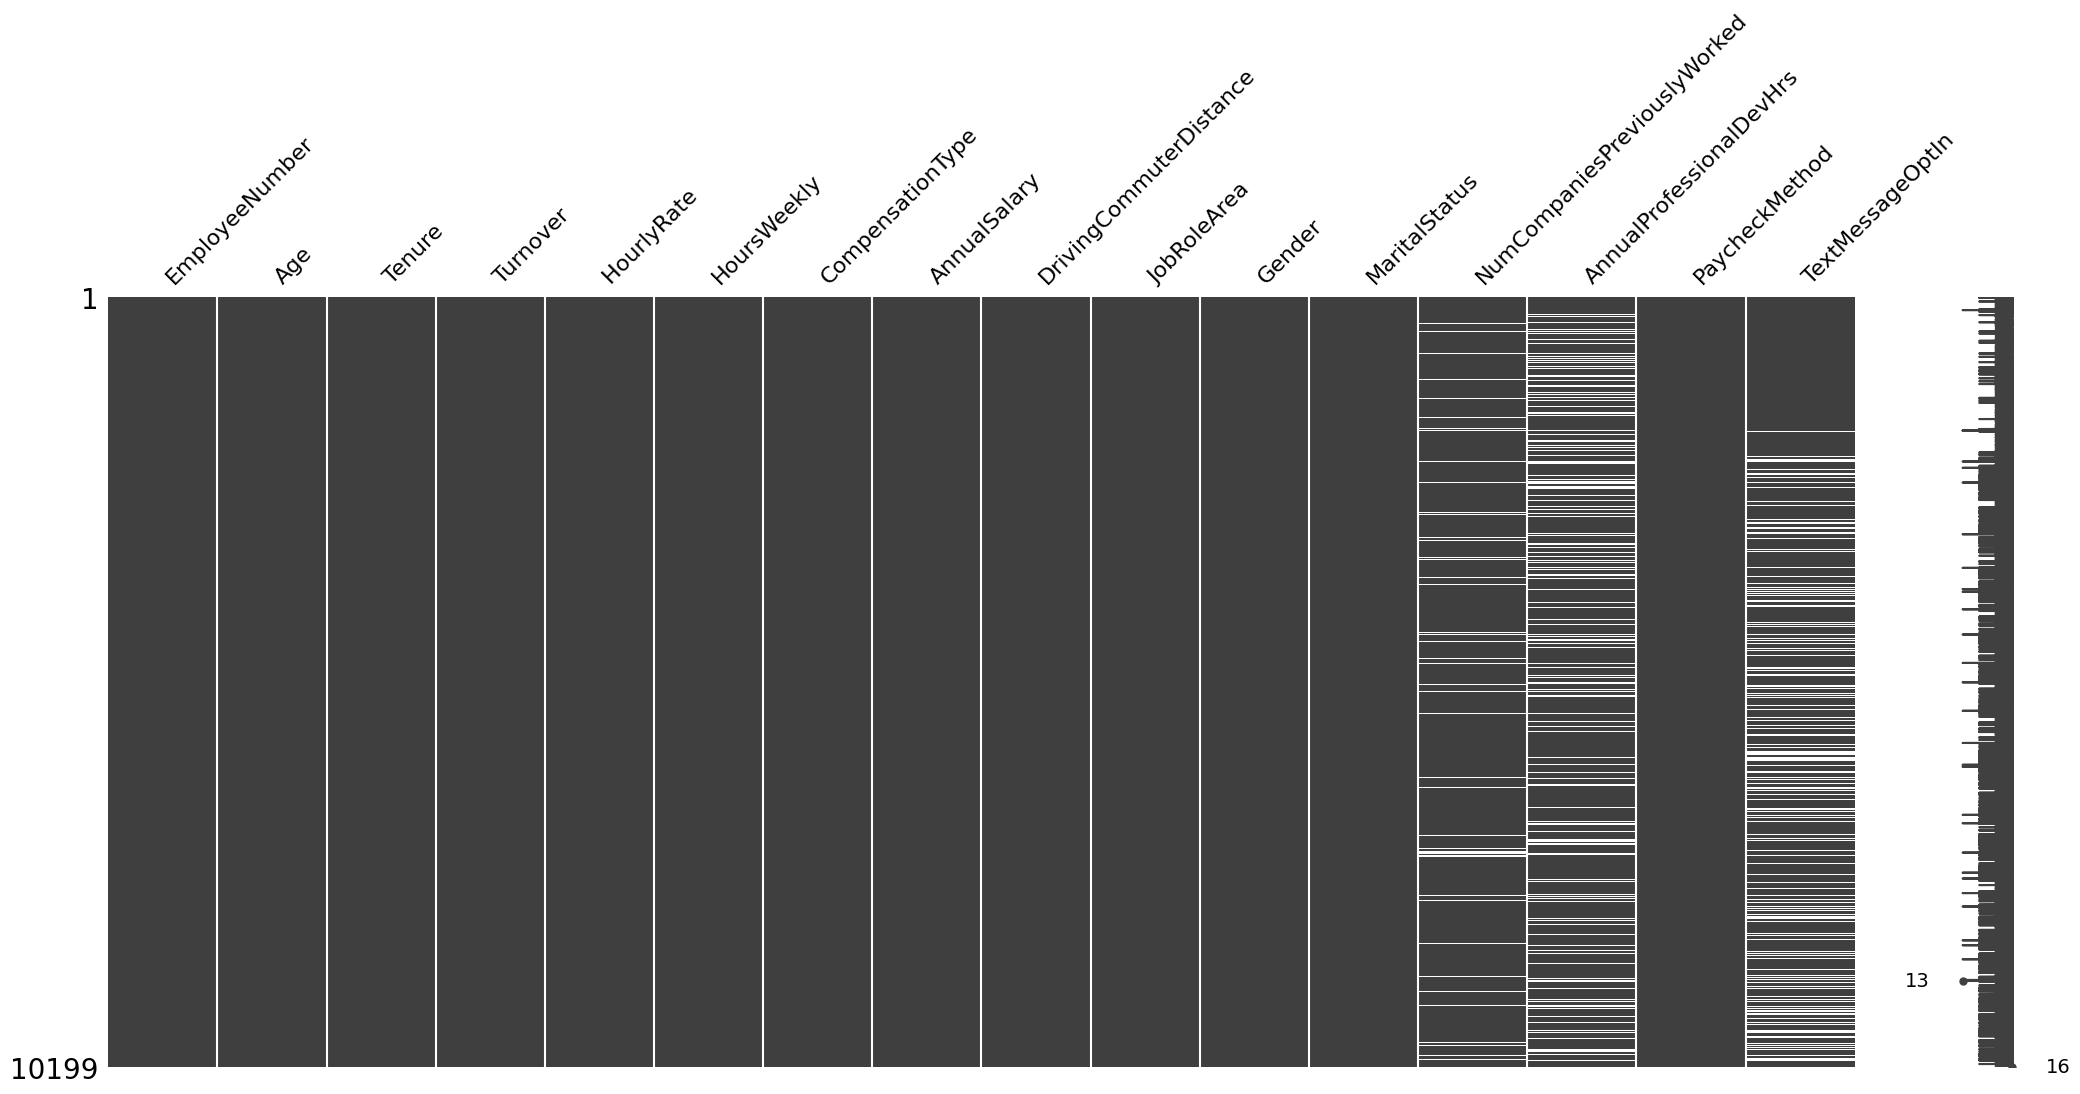

In [47]:
msno.matrix(df)

<Axes: >

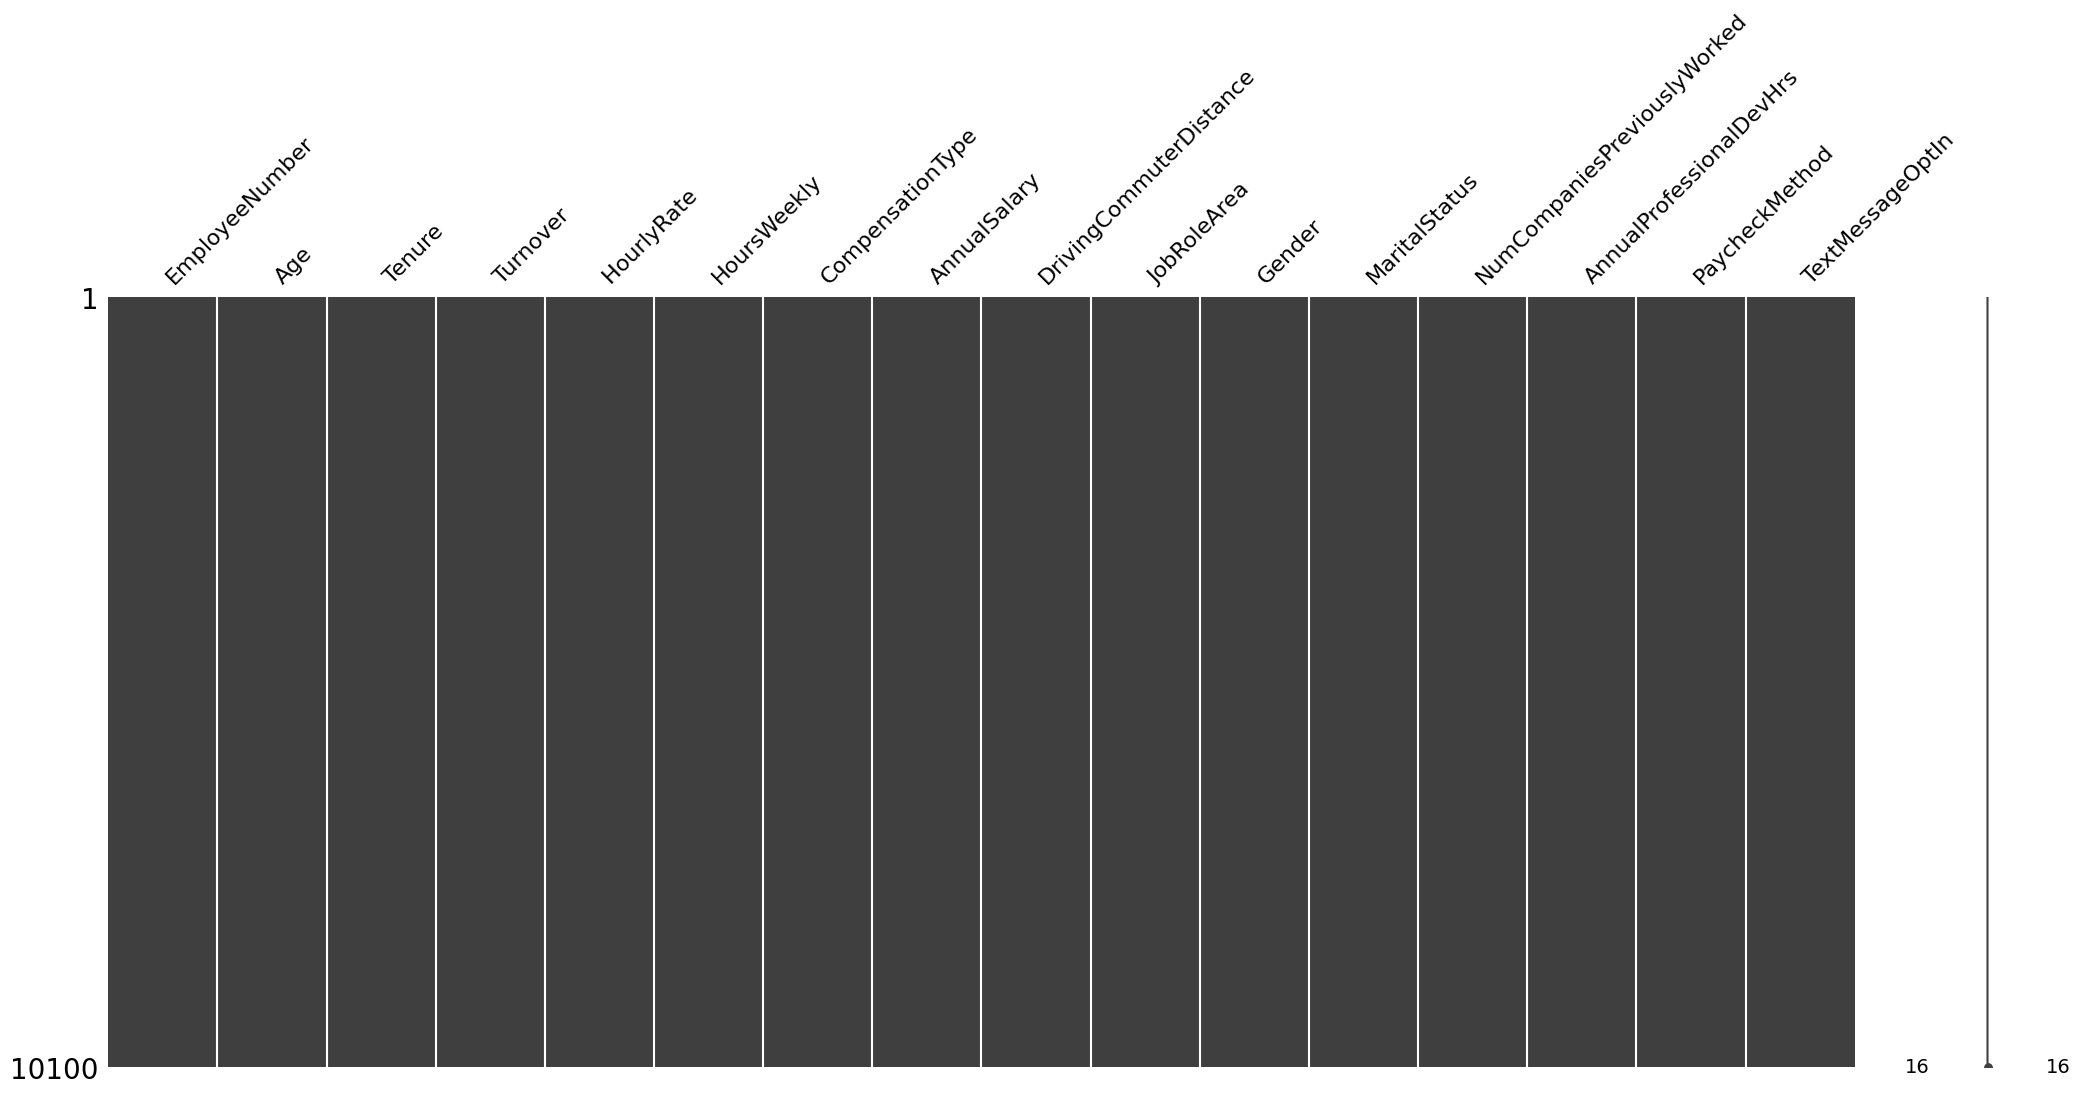

In [98]:
zero_imputer = SimpleImputer(strategy='constant', fill_value=0.0)
unknown_imputer = SimpleImputer(strategy='constant', fill_value="Unknown")
cols_to_impute = ["NumCompaniesPreviouslyWorked", "AnnualProfessionalDevHrs"]

df_imputation = pd.DataFrame(data=df_drop_duplicates)
df_imputation[cols_to_impute] = zero_imputer.fit_transform(df_imputation[cols_to_impute])
df_imputation[["TextMessageOptIn"]] = unknown_imputer.fit_transform(df_imputation[["TextMessageOptIn"]])
msno.matrix(df_imputation)

### Inconsistent Values

In the below code blocks I explore the data for inconsistent or inappropriate values and correct where needed.

Below we can see that the minimum values for AnnualSalary and DrivingCommuterDistance are negative, which makes no sense. Further exploration will be conducted in these two columns.

In [65]:
df_imputation.describe()

,EmployeeNumber,Age,Tenure,HoursWeekly,AnnualSalary,DrivingCommuterDistance,NumCompaniesPreviouslyWorked,AnnualProfessionalDevHrs
count,10100.000000,10100.000000,10100.000000,10100.0,10100.000000,10100.000000,10100.000000,10100.000000
mean,5050.500000,44.078911,9.007624,40.0,120994.773564,45.165743,3.942970,12.062871
std,2915.763193,10.213311,5.512046,0.0,77358.965898,51.390866,2.618329,8.039554
min,1.000000,21.000000,1.000000,40.0,-33326.400000,-275.000000,0.000000,0.000000
25%,2525.750000,37.000000,5.000000,40.0,63440.000000,13.000000,2.000000,6.000000
50%,5050.500000,44.000000,8.000000,40.0,101774.400000,42.000000,3.000000,12.000000
75%,7575.250000,53.000000,13.000000,40.0,153717.200000,71.000000,6.000000,19.000000
max,10100.000000,61.000000,20.000000,40.0,339950.400000,950.000000,9.000000,25.000000


Starting with DrivingCommuterDistance we can see that there are 1343 rows where the commute distance is less than zero. To correct this I will remove the negative and replace all of the values with their positive counterpart.

In [66]:
df_abs = pd.DataFrame(data=df_imputation)
df_imputation[df_imputation["DrivingCommuterDistance"] < 0]

,EmployeeNumber,Age,Tenure,Turnover,HourlyRate,HoursWeekly,CompensationType,AnnualSalary,DrivingCommuterDistance,JobRoleArea,Gender,MaritalStatus,NumCompaniesPreviouslyWorked,AnnualProfessionalDevHrs,PaycheckMethod,TextMessageOptIn
30,31,30,1,No,$24.50,40,Salary,50960.0,-4,Human_Resources,Female,Divorced,3.0,17.0,Mailed Check,Yes
31,32,34,2,No,$24.50,40,Salary,50960.0,-4,Human_Resources,Female,Divorced,3.0,0.0,Mailed Check,Yes
54,55,44,16,No,$31.30,40,Salary,-15896.0,-5,Marketing,Male,Divorced,8.0,22.0,Mail Check,Yes
55,56,50,8,No,$31.30,40,Salary,-15896.0,-5,Marketing,Male,Divorced,5.0,10.0,Mail Check,Yes
64,65,30,3,Yes,$29.49,40,Salary,-28660.8,-8,Marketing,Female,Married,1.0,19.0,Mail Check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10029,10030,44,5,No,$92.48,40,Salary,332358.4,-7,Marketing,Female,Single,5.0,0.0,Mail Check,No
10039,10040,61,18,No,$71.91,40,Salary,149572.8,-6,Sales,Female,Divorced,4.0,16.0,Mailed Check,Yes
10041,10042,61,14,Yes,$33.25,40,Salary,69160.0,-5,Manufacturing,Male,Divorced,9.0,9.0,Mailed Check,No
10096,10097,33,9,Yes,$23.28,40,Salary,48422.4,-10,Marketing,Male,Single,1.0,20.0,Direct_Deposit,Yes


In [67]:
df_abs["DrivingCommuterDistance"] = df_abs["DrivingCommuterDistance"].abs()
df_abs[df_abs["DrivingCommuterDistance"] < 0]

,EmployeeNumber,Age,Tenure,Turnover,HourlyRate,HoursWeekly,CompensationType,AnnualSalary,DrivingCommuterDistance,JobRoleArea,Gender,MaritalStatus,NumCompaniesPreviouslyWorked,AnnualProfessionalDevHrs,PaycheckMethod,TextMessageOptIn


From the code above we can see that by taking the absolute value of every value, we remove the improper negative values. The steps are repeated for the next column with negative inconsistancies, AnnualSalary.

In [68]:
df_imputation[df_imputation["AnnualSalary"] < 0].count()
#this shows us 53 rows with a negative annual salary

EmployeeNumber                  53
Age                             53
Tenure                          53
Turnover                        53
HourlyRate                      53
HoursWeekly                     53
CompensationType                53
AnnualSalary                    53
DrivingCommuterDistance         53
JobRoleArea                     53
Gender                          53
MaritalStatus                   53
NumCompaniesPreviouslyWorked    53
AnnualProfessionalDevHrs        53
PaycheckMethod                  53
TextMessageOptIn                53
dtype: int64

In [69]:
df_abs["AnnualSalary"] = df_abs["AnnualSalary"].abs()
df_abs[df_abs["AnnualSalary"] < 0]
#This confirms the negative values were converted to positive successfully

,EmployeeNumber,Age,Tenure,Turnover,HourlyRate,HoursWeekly,CompensationType,AnnualSalary,DrivingCommuterDistance,JobRoleArea,Gender,MaritalStatus,NumCompaniesPreviouslyWorked,AnnualProfessionalDevHrs,PaycheckMethod,TextMessageOptIn


For these inconsistancies I utilized the absolute value method to convert the inconsistant negative values with positive.

<br /><br />
    <ul>Pros of a .abs:
        <li>Efficient and effective at replacing negative numbers with their positive counterpart</li>
        <li>Able to be executed simply, without much alteration of the data frame.</li></ul>
        <br />
    <ul>Cons of .abs:
        <li>If the data was completely incorrect, not just accidently negative, then the data would be skewed by this. However, there was no indication that this was the case.</li>
        <li>Does not address any other inconsistancies, only converts negatives into positives, so other inconsistancies could be overlooked.</li></ul>


### Outliers

The last cleaning we will undergo is accounting for outliers. From viewing the statistics about our dataset we can see that the minimum value for Annual Salary is 1307.2 which is far too low for an annual salary with the provided hourly and hours worked per week.

In [94]:
df_cleaned = pd.DataFrame(data=df_abs)
df_abs.describe()

,EmployeeNumber,Age,Tenure,HoursWeekly,AnnualSalary,DrivingCommuterDistance,NumCompaniesPreviouslyWorked,AnnualProfessionalDevHrs
count,10100.000000,10100.000000,10100.000000,10100.0,10100.000000,10100.000000,10100.000000,10100.000000
mean,5050.500000,44.078911,9.007624,40.0,121154.328099,48.646535,3.942970,12.062871
std,2915.763193,10.213311,5.512046,0.0,77108.817860,48.108708,2.618329,8.039554
min,1.000000,21.000000,1.000000,40.0,1307.200000,0.000000,0.000000,0.000000
25%,2525.750000,37.000000,5.000000,40.0,63440.000000,15.000000,2.000000,6.000000
50%,5050.500000,44.000000,8.000000,40.0,101774.400000,42.000000,3.000000,12.000000
75%,7575.250000,53.000000,13.000000,40.0,153717.200000,71.000000,6.000000,19.000000
max,10100.000000,61.000000,20.000000,40.0,339950.400000,950.000000,9.000000,25.000000


In [103]:
df_abs[df_abs["AnnualSalary"] < 15000]

,EmployeeNumber,Age,Tenure,Turnover,HourlyRate,HoursWeekly,CompensationType,AnnualSalary,DrivingCommuterDistance,JobRoleArea,Gender,MaritalStatus,NumCompaniesPreviouslyWorked,AnnualProfessionalDevHrs,PaycheckMethod,TextMessageOptIn
42,43,21,1,Yes,$22.24,40,Salary,5259.2,13,Research,Female,Single,3.0,12.0,Direct_Deposit,Yes
43,44,23,1,Yes,$22.24,40,Salary,5259.2,13,Research,Female,Married,2.0,11.0,Direct_Deposit,Yes
408,409,22,1,Yes,$21.46,40,Salary,3636.8,65,Research,Female,Single,3.0,20.0,Mail Check,Yes
504,505,26,3,Yes,$21.60,40,Salary,3928.0,79,Research,Female,Single,2.0,12.0,Mailed Check,Yes
605,606,47,9,No,$32.58,40,Salary,10433.6,125,Marketing,Male,Divorced,0.0,0.0,Direct_Deposit,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9588,9589,52,6,No,$32.39,40,Salary,10828.8,34,Marketing,Male,Married,8.0,23.0,Mailed Check,Yes
9631,9632,37,1,No,$31.74,40,Salary,14980.8,94,Marketing,Male,Divorced,1.0,24.0,Mailed Check,Yes
9642,9643,25,3,No,$17.22,40,Salary,3581.6,12,Human Resources,Female,Single,3.0,9.0,MailedCheck,Yes
9843,9844,22,1,No,$22.01,40,Salary,4780.8,27,Research,Female,Married,2.0,0.0,Mail Check,Yes


Upon further exploration, there are numerous annual salaries that do not make sense or coincide with the provided hourly rate and hours worked per week. Due to this I will replace all the values in Annual Salary and replace it with the appropriate calculation by multiplying the hourly rate by the hours weekly, and multiplying that by the 52 weeks in a year to get the accurate annual salary.

We began by fixing a spacing error with out HourlyRate column name. Then I remove the dollar signs from the column and convert it into a numeric column to prepare it for the calculations. Below you can see these were successful and the data type was changed to float64.

In [96]:
df_cleaned.rename(columns={"HourlyRate ": "HourlyRate"}, inplace=True)
df_cleaned["HourlyRate"] = df_cleaned["HourlyRate"].astype(str).str.replace(r"[\$,]", "", regex=True)
df_cleaned["HourlyRate"] = pd.to_numeric(df_cleaned["HourlyRate"], errors='coerce')
df_cleaned["HourlyRate"]

0        24.37
1        24.37
2        22.52
3        22.52
4        88.77
         ...  
10095    61.78
10096    23.28
10097    28.25
10098    32.22
10099    44.59
Name: HourlyRate, Length: 10100, dtype: float64

In [97]:
df_cleaned["AnnualSalary"] = df_cleaned["HourlyRate"] * df_cleaned["HoursWeekly"] * 52
df_cleaned.describe()

,EmployeeNumber,Age,Tenure,HourlyRate,HoursWeekly,AnnualSalary,DrivingCommuterDistance,NumCompaniesPreviouslyWorked,AnnualProfessionalDevHrs
count,10100.000000,10100.000000,10100.000000,10100.000000,10100.0,10100.000000,10100.000000,10100.000000,10100.000000
mean,5050.500000,44.078911,9.007624,52.838207,40.0,109903.470416,48.646535,3.942970,12.062871
std,2915.763193,10.213311,5.512046,23.891318,0.0,49693.942213,48.108708,2.618329,8.039554
min,1.000000,21.000000,1.000000,17.210000,40.0,35796.800000,0.000000,0.000000,0.000000
25%,2525.750000,37.000000,5.000000,31.080000,40.0,64646.400000,15.000000,2.000000,6.000000
50%,5050.500000,44.000000,8.000000,48.930000,40.0,101774.400000,42.000000,3.000000,12.000000
75%,7575.250000,53.000000,13.000000,73.902500,40.0,153717.200000,71.000000,6.000000,19.000000
max,10100.000000,61.000000,20.000000,98.070000,40.0,203985.600000,950.000000,9.000000,25.000000


As we can see above the minimum value for AnnualSalary is more appropriate, confirming our calculations. 

For these outliers I did a complete reinsertion of values. 

<ul>Pros of redoing the calculation:
    <li>Due to the number of inconsistant annual salaries, replacing all the values will ensure the data is accurate and correct.</li>
    <li>Removes the need to search for more inconsistancies, as all the values were re-calculated</li></ul>
<br />
<ul>Cons of redoing the calculation:
    <li>Should there be other variables affecting the annual salary outside of the data provided in this data set(vacation time, sick leave, etc), then the data would be inaccurate. However, this is not indicated.</li>
    <li>Is a longer process than any other cleaning techniques done, so I was relying on the assumption that replacing the entire column would be more efficient than trying to sort through and clean the existing values.</li></ul>



### Exporting to CSV

Our last step is exporting our cleaned file to CSV for future use.

In [104]:
df_cleaned.to_csv("cleaned_dataset.csv", index=False)